In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('carprices.csv')
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


<AxesSubplot: xlabel='Mileage', ylabel='Sell Price($)'>

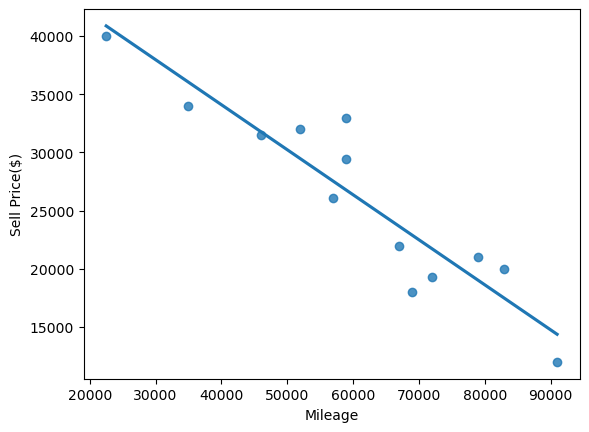

In [12]:
sns.regplot(x=df['Mileage'],y=df['Sell Price($)'],data=df,ci=None)

<AxesSubplot: xlabel='Age(yrs)', ylabel='Sell Price($)'>

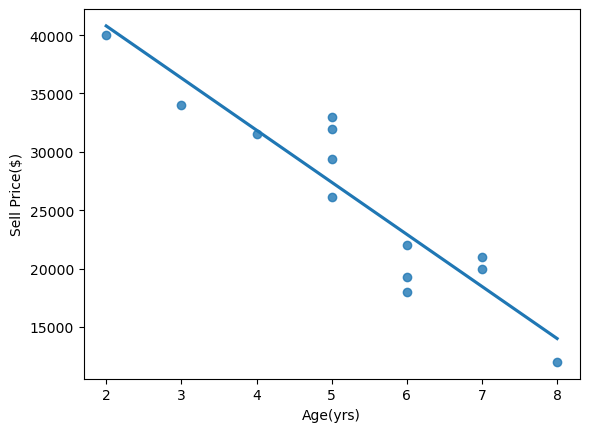

In [13]:
sns.regplot(x=df['Age(yrs)'],y=df['Sell Price($)'],data=df,ci=None)

In [7]:
dummies = pd.get_dummies(df['Car Model'],drop_first=True)
dummies

,BMW X5,Mercedez Benz C class
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,1


In [8]:
merged = pd.concat([df,dummies],axis=1)
merged

,Car Model,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,1,0
1,BMW X5,35000,34000,3,1,0
2,BMW X5,57000,26100,5,1,0
3,BMW X5,22500,40000,2,1,0
4,BMW X5,46000,31500,4,1,0
5,Audi A5,59000,29400,5,0,0
6,Audi A5,52000,32000,5,0,0
7,Audi A5,72000,19300,6,0,0
8,Audi A5,91000,12000,8,0,0
9,Mercedez Benz C class,67000,22000,6,0,1


In [9]:
merged.drop(['Car Model'],axis=1,inplace=True)
merged

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [10]:
X = merged.drop(['Sell Price($)'],axis=1)
X

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [11]:
y = merged['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [26]:
model.predict([[4500,4,0,1]])

c:\Users\mtayy\miniconda3\envs\dataScience\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([51981.26203334])

In [21]:
model.predict([[86000,7,1,0]])

c:\Users\mtayy\miniconda3\envs\dataScience\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [27]:
model.score(X,y)

0.9417050937281082